In [26]:
import pandas as pd 
import numpy as np
import jieba
from wordcloud import WordCloud
from snownlp import SnowNLP
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv(r"film8w5.csv",encoding = 'utf-8',lineterminator="\n")
# df.head()

## 好评率计算

In [28]:
# 去除 star 为“暂未评价”的数据
df_star = df.query("star != '暂未评价'")
score = {
    '力荐':10,
    '推荐':7,
    '还行':5,
    '较差':3,
    '很差':1
}
df_star['star'] = df_star["star"].map(score)
hight_praise_rate = df_star.groupby(by=["film"]).mean()
hight_praise_rate.reset_index(inplace=True)
# hight_praise_rate

# 保存
hight_praise_rate.to_csv("hightPraiseRate.csv",index=False)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,film,star
0,007之黑日危机,5.916279
1,101真狗,6.347418
2,92黑玫瑰对黑玫瑰,7.060748
3,97古惑仔战无不胜,6.232558
4,97家有喜事,6.042056
5,98古惑仔之龙争虎斗,5.879227
6,一个好人,5.495327
7,一个都不能少,6.910798
8,一树梨花压海棠,7.314554
9,一级恐惧,7.386792


In [95]:
# 排序
hight_praise_rate.sort_values(by='star' ,ascending=False)[:7] # 正序

hight_praise_rate.sort_values(by='star' ,ascending=True)[:7] # 倒序

,film,star
197,无言的山丘,9.684211
312,艺术创想,9.671498
232,泰坦尼克号,9.368421
206,星际牛仔,9.324201
310,肖申克的救赎,9.200000
309,老友记,9.196787
378,飞出个未来,9.134884


## 结巴分词

In [31]:
df['word'] = df['content'].map(lambda c: ' '.join(jieba.cut(c)))

In [34]:
# 去除停用词
def deleteStopWord(sentence):
    with open(r"stop_words.txt",'r',encoding='utf-8') as f:
        stop_word = f.read()
    s = ''
    for i in sentence.split(" "):
        if i not in stop_word:
            s += i + " "
    return s
df['remove_stopwords'] = df['word'].map(lambda c : deleteStopWord(c))
df.head()

,film,user,star,time,content,word,remove_stopwords
0,007之黑日危机,yf747126,还行,2006-05-07,一部还算成功的商业片，我永远都不明白为什么女人会喜欢数字先生,一部 还 算 成功 的 商业片 ， 我 永远 都 不 明白 为什么 女人 会 喜欢 数字 先生,一部 算 成功 商业片 永远 都 明白 女人 喜欢 数字 先生
1,007之黑日危机,托尼·王大拿,较差,2017-04-20,虽然苏菲·玛索人美戏好、丹妮丝·理查兹人美胸大，但咋又回到反派间歇性脑抽的老邦德路线了：直升...,虽然 苏菲 · 玛索 人美戏 好 、 丹妮丝 · 理查兹 人美 胸大 ， 但 咋 又 回到 ...,苏菲 玛索 人美戏 丹妮丝 理查兹 人美 胸大 回到 反派 间歇性 脑 抽 老 邦德 路线 ...
2,007之黑日危机,南條某葉,推荐,2013-01-30,007-19，我以为我没看过，下下来一看原来是看过的= =b，顺便：苏菲玛索好美！,007 - 19 ， 我 以为 我 没 看过 ， 下 下来 一看 原来 是 看过 的 = ...,007 19 以为 没 看过 下来 一看 原来 看过 顺便 苏菲 玛索 美
3,007之黑日危机,乐事,还行,2009-08-10,布卢斯皮尔斯南的007系列，还可以吧，不同的就是这部中有苏菲玛索饰演的，反面邦女郎。很美！,布卢斯 皮尔斯 南 的 007 系列 ， 还 可以 吧 ， 不同 的 就是 这部 中有 苏菲...,布卢斯 皮尔斯 南 007 系列 不同 这部 中有 苏菲 玛索 饰演 反面 邦 女郎 很 美
4,007之黑日危机,躺着也中枪,还行,2012-10-27,可惜了苏菲玛索这妹子，居然演的反派\r,可惜 了 苏菲 玛索 这 妹子 ， 居然 演 的 反派 \r,可惜 苏菲 玛索 妹子 居然 演 反派 \r


In [22]:
df.to_csv("sentence.csv",columns=["remove_stopwords"],index=False)

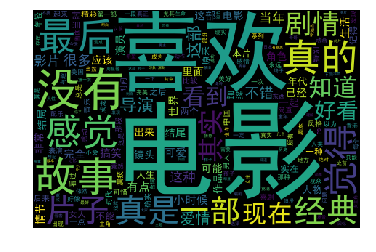

In [35]:
# 去除停用词的词云
all_words = df['remove_stopwords'].str.cat()

wc = WordCloud(width=450,height=300,max_font_size=150,font_path='SimHei.ttf')
wc.generate_from_text(all_words)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [36]:
# 进行词频统计
all_words = df['remove_stopwords'].str.cat()
from collections import Counter 
cnts = Counter(all_words.split(" "))
cnts = pd.DataFrame(cnts.items(),columns=['word','counts'])
# cnts

# 排序
# cnts.sort_values(by='counts' ,ascending=False)[:7]`

In [37]:
cnts.sort_values(by="counts",ascending=False)[:50] 

In [105]:
plot = ['情节', '故事', '编剧', '节奏', '高潮', '开篇', '铺垫', '转折', '叙事'
        ,'桥段', '主线','主题','题材','结局','剧本'] # 情节
frame = ['画面', '场景', '场面', '道具', '布景', '摄影', '实景'
        ,'视觉','镜头', '特效', '视效','全景','剪接','美景','景致','蓝光','高清'
        ,'特技','服装','构图','亮点','拍摄','色彩','造型','照明','奇幻','特写','景物','剪辑'] # 画面
sound = ['配音', '声音', '音效','配乐', '美妙', '配音','声音','音效','配乐','音乐','听觉','消音','音节','音频','音响','音奏','音色','音量']
Filmmaker = ['表演', '演技', '演的', '表演', '演员','明星','影人','导演','阵容','出场','戏份','主演','出演','扮演','饰演','角色','扮演者','演戏'] # 影人
# 关键词，词频表
def keywordCount(keyword,cnts):
#     sum = 0
    l = []
    for i in keyword:
        for j in cnts["word"]:
            if i == j:
                index = cnts[cnts['word'].isin([j])].index.values[0]
                l.append(index)
#                 count = np.array(cnts.iloc[[index],[1]]).tolist()[0][0]  
#                 sum += count
    return cnts.iloc[l,:]

plot_df = keywordCount(plot,cnts) # 情节
frame_df = keywordCount(frame,cnts) # 画质
sound_df = keywordCount(sound,cnts) # 音效
Filmmaker_df = keywordCount(Filmmaker,cnts) # 影人

In [110]:
print("情节: ", plot_df['counts'].sum())
print("画质: " ,frame_df['counts'].sum())
print("音效: " ,sound_df['counts'].sum())
print("影人: " , Filmmaker_df['counts'].sum())

情节:  13989
画质:  8463
音效:  5114
影人:  12398


In [112]:
cnts

,word,counts
0,一部,4405
1,算,591
2,成功,658
3,商业片,161
4,永远,1214
5,都,16415
6,明白,611
7,女人,1360
8,喜欢,7845
9,数字,24


## 使用 snownlp简单的情感分析

In [73]:
df.head()

,film,user,star,time,content,word,remove_stopwords
0,007之黑日危机,yf747126,还行,2006-05-07,一部还算成功的商业片，我永远都不明白为什么女人会喜欢数字先生,一部 还 算 成功 的 商业片 ， 我 永远 都 不 明白 为什么 女人 会 喜欢 数字 先生,一部 算 成功 商业片 永远 都 明白 女人 喜欢 数字 先生
1,007之黑日危机,影子熊揉着眼睛,推荐,2013-01-24,这部在布鲁斯南系的007里已经是最讨人喜欢的一部了，场面大，节奏满，邦德也稍微硬派了些（是和...,这部 在 布鲁斯南 系 的 007 里 已经 是 最 讨人喜欢 的 一部 了 ， 场面 大 ...,这部 布鲁斯南 系 007 已经 最 讨人喜欢 一部 场面 大 节奏 满 邦德 稍微 硬派 ...
2,007之黑日危机,蟹老板,还行,2009-05-02,在晓起看第一部007，感觉那个女主持人的气质很像，于是果然就是邬君梅，喜欢。这个电影，我和毛...,在晓起 看 第一部 007 ， 感觉 那个 女 主持人 的 气质 很 像 ， 于是 果然 就...,在晓起 第一部 007 感觉 女 主持人 气质 很 邬君梅 喜欢 电影 毛弟 笑 完
3,007之黑日危机,Maggie,推荐,2010-05-12,brosnan+sophie marceau!,brosnan + sophie marceau !,brosnan sophie marceau !
4,007之黑日危机,Yam,推荐,2012-05-06,There is no point living if you can't feel ali...,There is no point living if you ...,There is no point living if you can t feel ali...


In [89]:
def get_sentiments_score(comment):
    sents = SnowNLP(comment).sentences # 分句
    sentiment_score = np.mean([SnowNLP(sent).sentiments for sent in sents])
    return sentiment_score

df['sentiment_score'] = df["content"].map(get_sentiments_score)


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
df.sort_values(by='sentiment_score' ,ascending=True)[:7] 

In [90]:
df.head()

,film,user,star,time,content,word,remove_stopwords,sentiment_score
0,007之黑日危机,yf747126,还行,2006-05-07,一部还算成功的商业片，我永远都不明白为什么女人会喜欢数字先生,一部 还 算 成功 的 商业片 ， 我 永远 都 不 明白 为什么 女人 会 喜欢 数字 先生,一部 算 成功 商业片 永远 都 明白 女人 喜欢 数字 先生,0.878193
1,007之黑日危机,影子熊揉着眼睛,推荐,2013-01-24,这部在布鲁斯南系的007里已经是最讨人喜欢的一部了，场面大，节奏满，邦德也稍微硬派了些（是和...,这部 在 布鲁斯南 系 的 007 里 已经 是 最 讨人喜欢 的 一部 了 ， 场面 大 ...,这部 布鲁斯南 系 007 已经 最 讨人喜欢 一部 场面 大 节奏 满 邦德 稍微 硬派 ...,0.724035
2,007之黑日危机,蟹老板,还行,2009-05-02,在晓起看第一部007，感觉那个女主持人的气质很像，于是果然就是邬君梅，喜欢。这个电影，我和毛...,在晓起 看 第一部 007 ， 感觉 那个 女 主持人 的 气质 很 像 ， 于是 果然 就...,在晓起 第一部 007 感觉 女 主持人 气质 很 邬君梅 喜欢 电影 毛弟 笑 完,0.736336
3,007之黑日危机,Maggie,推荐,2010-05-12,brosnan+sophie marceau!,brosnan + sophie marceau !,brosnan sophie marceau !,0.473767
4,007之黑日危机,Yam,推荐,2012-05-06,There is no point living if you can't feel ali...,There is no point living if you ...,There is no point living if you can t feel ali...,0.000736
